#Análise de Texto

## Importação e instalação das bibliotecas

In [ ]:
!pip install spacy==2.2.3

In [ ]:
!python3 -m spacy download pt_core_news_sm

In [ ]:
import spacy
import numpy as np
import pandas as pd

## Carregando a bases de dados

Fonte: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

Obs: no treino temos diferente tamanhos de base, mas para o nosso estudo vamos utilizar a de 50mil.
Mais detalhes no link.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Labdata/Aulas - Materiais/Análise de Sentimentos com o Twitter/dataset-analise-de-sentimentos-com-o-twitter/Train50.csv', delimiter=';')
df.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [ ]:
df = df.drop(['id', 'tweet_date', 'query_used'], axis=1)

## Análise Exploratória

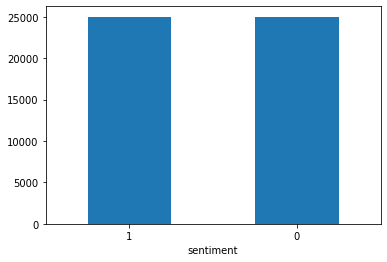

In [ ]:
df.value_counts('sentiment').plot(kind='bar', rot='360');

In [ ]:
df.isnull().sum()

id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

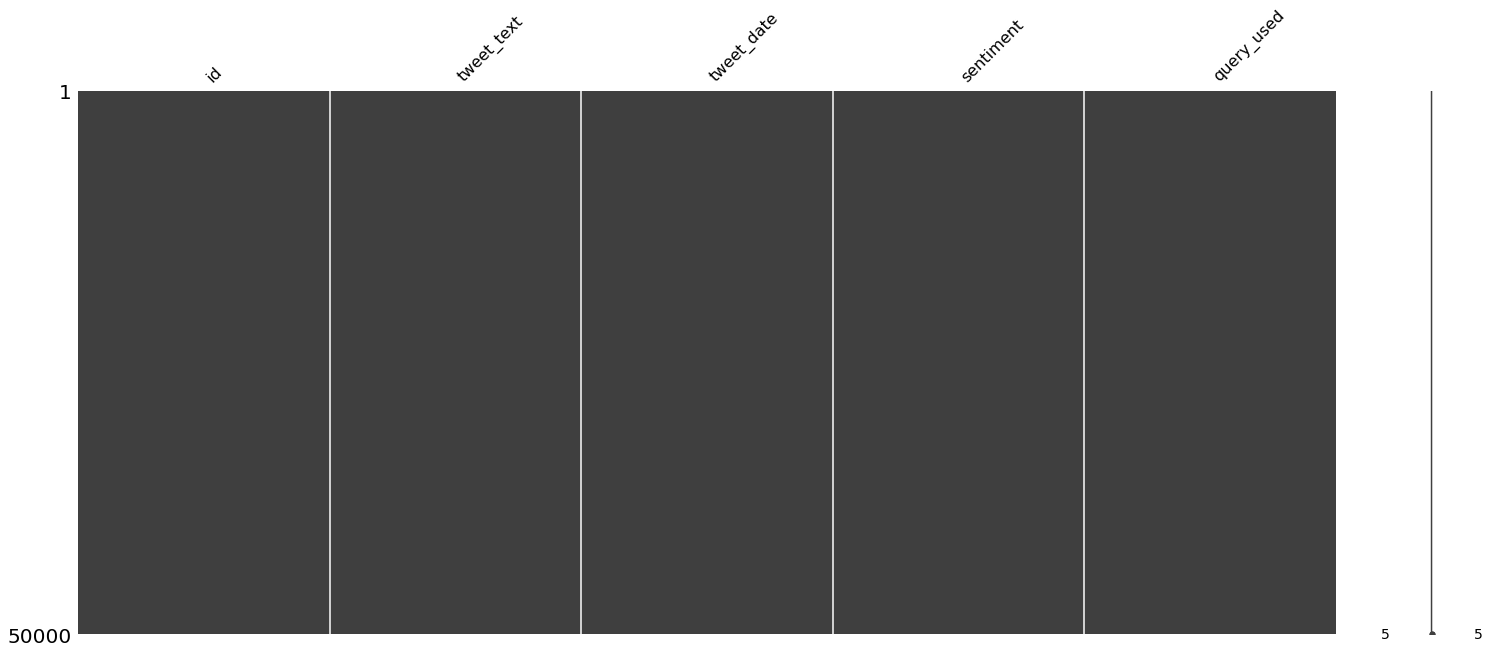

In [ ]:
import missingno as msgn
msgn.matrix(df);

https://github.com/ResidentMario/missingno

## Criando Nova Coluna com Texto Tratado

In [ ]:
nlp = spacy.load('pt_core_news_sm')

In [ ]:
# https://www.youtube.com/watch?v=K8L6KVGG-7o&t=2s
import re # biblioteca para aplicar regex

In [ ]:
def preprocessing(text):
    text = text.lower()

    # retira nome do usuário: @labdata
    text = re.sub(r"@[A-Za-z0-9$-_@.&+]+", '', text)

    # retira as URLs
    text = re.sub(r"https?://[A-Za-z0-9./]+", '', text)

    # retira espaços em branco extras no meio do texto, no começo e no fim
    text = re.sub(r" +", ' ', text).strip()

    # substituir emoticons por texto
    lista_emoticons = {
        ':)': 'emocaopositiva',
        ':d': 'emocaopositiva',
        ':(': 'emocaonegativa'
    }
    for emoticon in emoticons:
        text = text.replace(emoticon, emoticons[emoticon])

    doc = nlp(text)

    # remove pontuacão, stop_word e dígitos
    # pega apenas o lemma da palavra
    lista = []
    for token in doc:
        if not token.is_punct and not token.is_stop and not token.like_num:
            lista.append(token.lemma_)

    # transforma a lista em um texto
    text_processed = ' '.join(lista)
    return text_processed

In [ ]:
# aplicando o pré-processamento na base
df['tweet_text_cleaned'] = df['tweet_text'].apply(preprocessing)
df.head()

,tweet_text,sentiment,tweet_text_cleaned,len_text,len_text_cleaned,all,qtd_palavras,qtd_palavras_cleaned
0,@Laranjito76 A pessoa certa para isso seria o ...,1,pessoa certo valer azevedo emocaopositiva,12,5,,12,5
1,"@behin_d_curtain Para mim, é precisamente o co...",1,mim precisamente contrário emocaopositiva chuv...,17,7,,17,7
2,Vou fazer um video hoje... estou pensando em f...,1,ir video hoje pensar falar meter csgo paginar ...,34,17,,34,17
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1,aaaaaaaa amar polaroids expressar to apaixonar...,24,17,,24,17
4,Valoriza o coração do menininho que vc tem. El...,1,valorizar coração menino vc diferente fazer so...,35,14,,35,14


In [ ]:
def conta_palavras(text):
    return len(text.strip().split(' '))

# criando algumas variáveis para análise
df = (
    df
    .assign(qtd_palavras = df['tweet_text'].apply(conta_palavras))
    .assign(qtd_palavras_cleaned = df['tweet_text_cleaned'].apply(conta_palavras))
)

In [ ]:
# análise simples
df['qtd_palavras'].describe()

count    50000.000000
mean        14.384160
std         10.939809
min          1.000000
25%          6.000000
50%         11.000000
75%         19.000000
max         65.000000
Name: qtd_palavras, dtype: float64

In [ ]:
# análise simples
df['qtd_palavras_cleaned'].describe()

count    50000.000000
mean         7.134200
std          5.327419
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        106.000000
Name: qtd_palavras_cleaned, dtype: float64

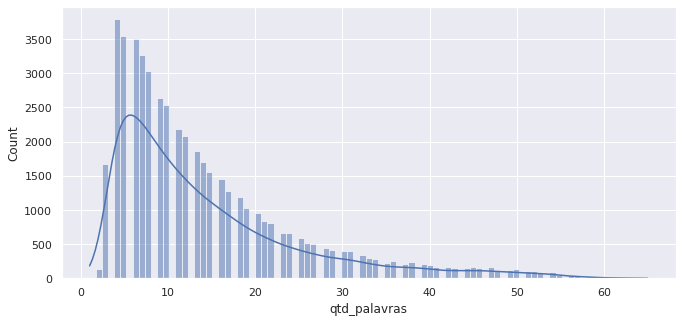

In [ ]:
# distribuição da quantidade de palavras
sns.histplot(data=df, x='qtd_palavras', kde=True);

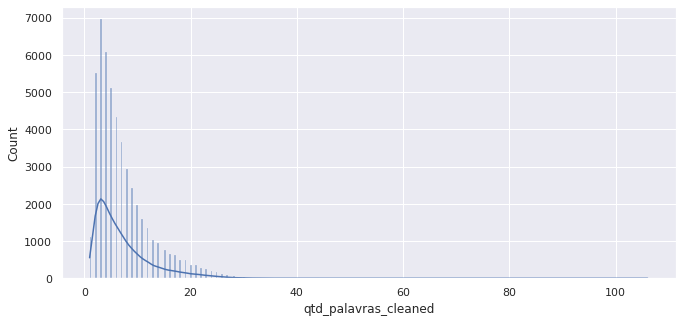

In [ ]:
# distribuição das
sns.histplot(data=df, x='qtd_palavras_cleaned', kde=True);

###Separando os sentimentos

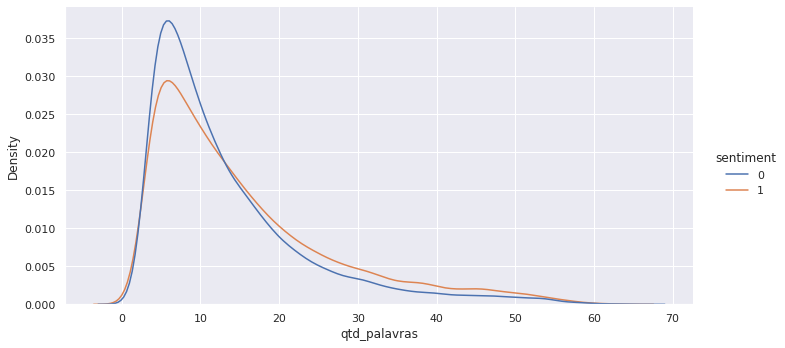

In [ ]:
sns.displot(data=df, x='qtd_palavras', kind='kde', hue='sentiment', aspect=2);

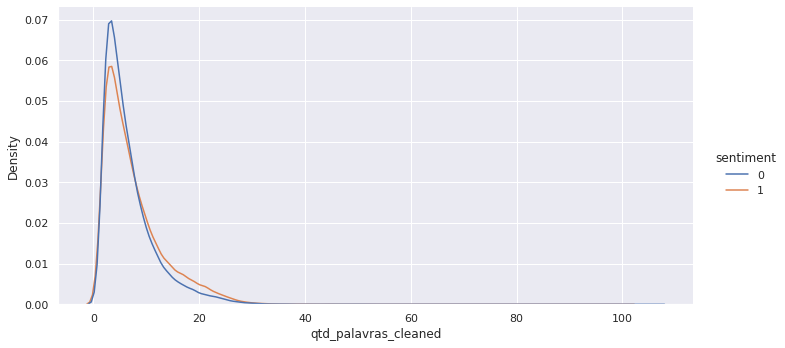

In [ ]:
sns.displot(data=df, x='qtd_palavras_cleaned', kind='kde', hue='sentiment', aspect=2);

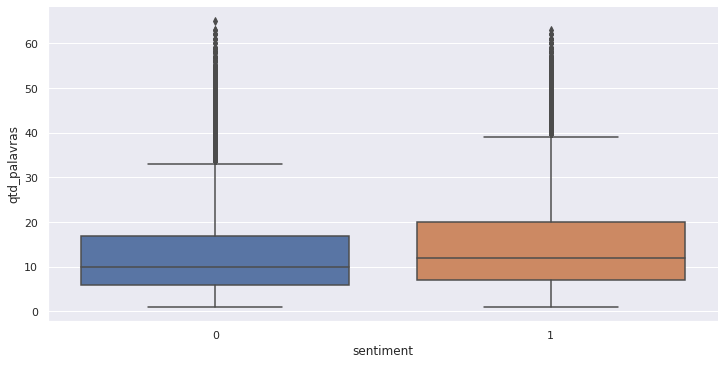

In [ ]:
sns.catplot(x="sentiment", y='qtd_palavras', kind='box', aspect=2, data=df);

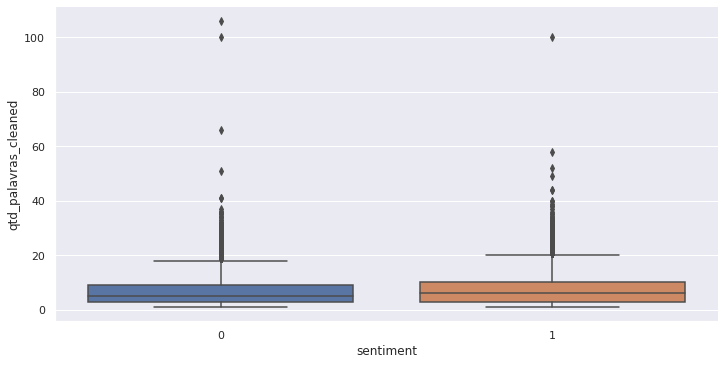

In [ ]:
sns.catplot(x="sentiment", y='qtd_palavras_cleaned', kind='box', aspect=2, data=df);

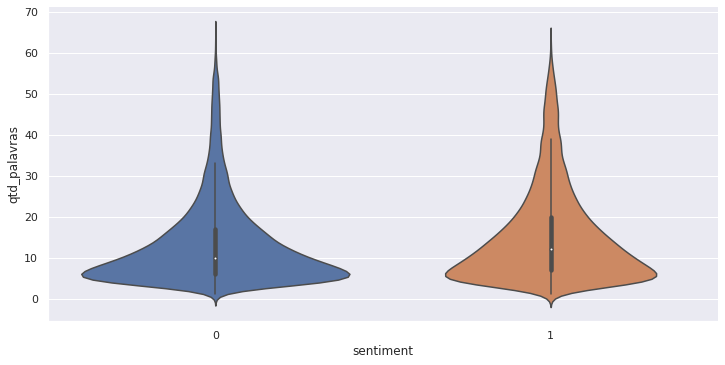

In [ ]:
sns.catplot(x="sentiment", y='qtd_palavras', kind='violin', aspect=2, data=df);

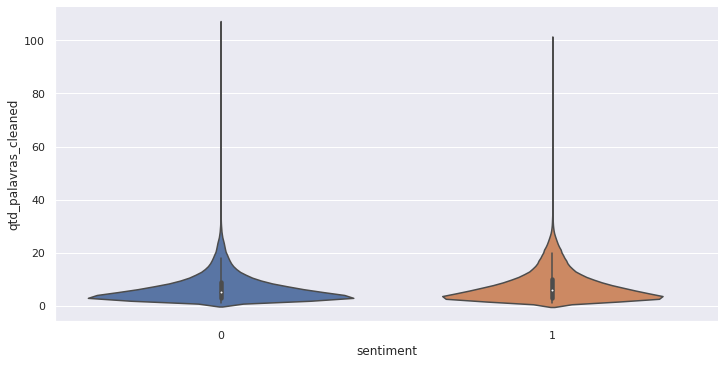

In [ ]:
sns.catplot(x="sentiment", y='qtd_palavras_cleaned', kind='violin', aspect=2, data=df);

## Nuvem de palavras

### Texto original

In [ ]:
# pega todo o texto da coluna em uma única string
full_text = ' '.join(df['tweet_text'])

In [ ]:
# cria o objeto da figura da word cloud
from wordcloud import WordCloud
wc = WordCloud(background_color='black').generate(full_text)

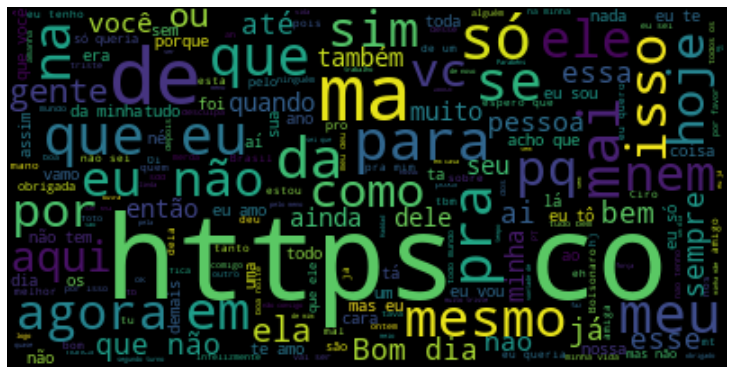

In [ ]:
# plota a word cloud
import matplotlib.pyplot as plt

plt.imshow(wc, interpolation='bilinear')
plt.grid('off') # retira grade
plt.axis('off') # retira eixos
plt.tight_layout(pad=0) # ajusta o tamanho

### Texto limpo

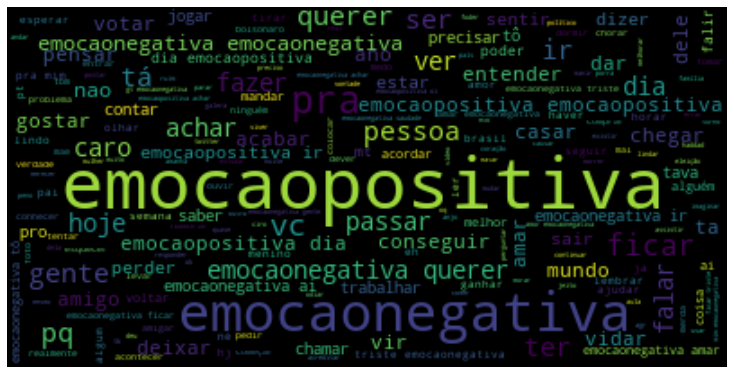

In [ ]:
full_text_cleaned = ' '.join(df['tweet_text_cleaned'])

wc = WordCloud(background_color='black').generate(full_text_cleaned)

plt.imshow(wc, interpolation='bilinear')
plt.grid('off') 
plt.axis('off') 
plt.tight_layout(pad=0)

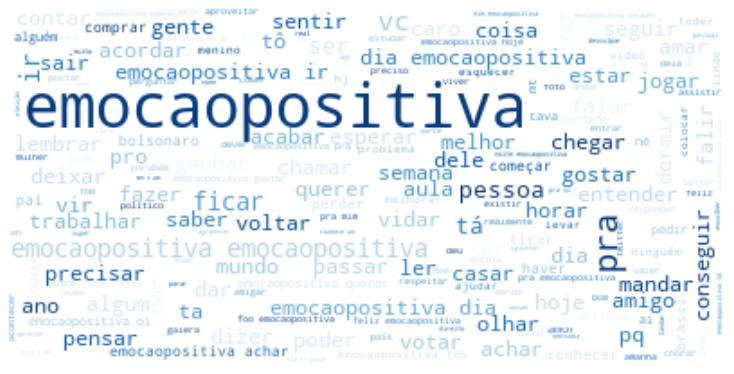

In [ ]:
# word cloud para sentimentos positivos
full_text_pos_cleaned = ' '.join(df.query('sentiment == 1')['tweet_text_cleaned'])

wc = WordCloud(background_color='white', colormap='Blues').generate(full_text_pos_cleaned)

plt.imshow(wc, interpolation='bilinear')
plt.grid('off') 
plt.axis('off') 
plt.tight_layout(pad=0)

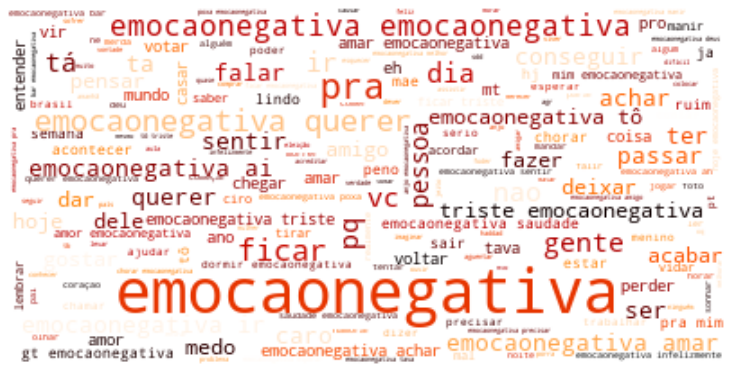

In [ ]:
# word cloud para sentimentos negativos
full_text_neg_cleaned = ' '.join(df.query('sentiment == 0')['tweet_text_cleaned'])

wc = WordCloud(background_color='white', colormap='gist_heat').generate(full_text_neg_cleaned)

plt.imshow(wc, interpolation='bilinear')
plt.grid('off') 
plt.axis('off') 
plt.tight_layout(pad=0)

## N-gram

N-gram é uma tentativa de buscar as palavras em contexto, junto com N outras palavras. Um N-gram muito utilizado é o bigrama, que representa a junção de 2 palavras.

In [ ]:
from nltk import FreqDist

full_tweet_tokens = ' '.join(df['tweet_text_cleaned']).split(' ')

freq_dist = FreqDist()
for token in full_tweet_tokens:
    freq_dist[token] += 1

freq_dist.most_common(10)

[('emocaonegativa', 24639),
 ('emocaopositiva', 23049),
 ('pra', 5425),
 ('ir', 4135),
 ('querer', 3084),
 ('dia', 3057),
 ('q', 3044),
 ('ficar', 3025),
 ('to', 2409),
 ('vc', 2059)]

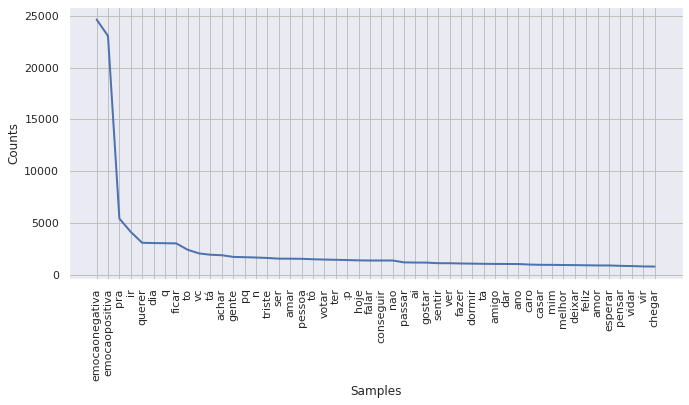

In [ ]:
# plotting top 50 palavras mais frequentes
freq_dist.plot(50)

### Bi-Grama

In [ ]:
from nltk import bigrams

bigramas = bigrams(full_tweet_tokens)

freq_dist_bigramas = FreqDist()
for bigrama in bigramas:
    freq_dist_bigramas[bigrama] += 1

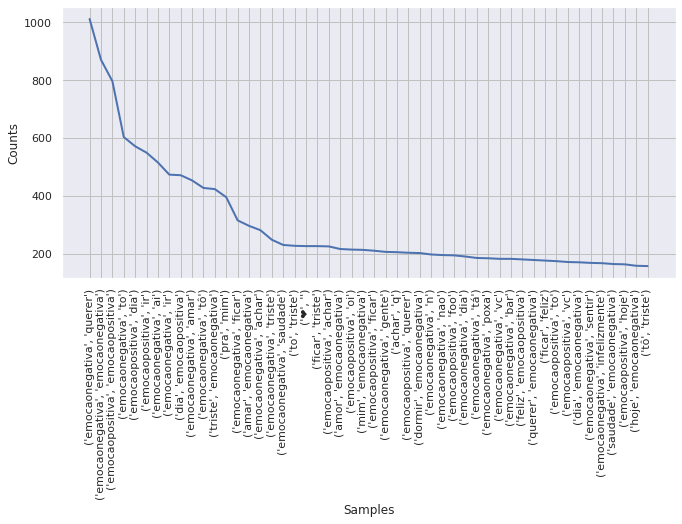

In [ ]:
freq_dist_bigramas.plot(50);

### Tri-Grama

In [ ]:
from nltk import trigrams

trigramas = trigrams(full_tweet_tokens)

freq_dist_trigramas = FreqDist()
for trigrama in trigramas:
    freq_dist_trigramas[trigrama] += 1

In [ ]:
freq_dist_trigramas.most_common(5)

[(('emocaopositiva', 'dia', 'emocaopositiva'), 159),
 (('❤', '❤', '❤'), 111),
 (('emocaonegativa', 'amar', 'emocaonegativa'), 108),
 (('emocaopositiva', 'emocaopositiva', 'emocaopositiva'), 101),
 (('conseguir', 'concretizar', 'objetivos'), 96)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128158 missing from current font.
  font.set_text(s, 0, flags=flags)


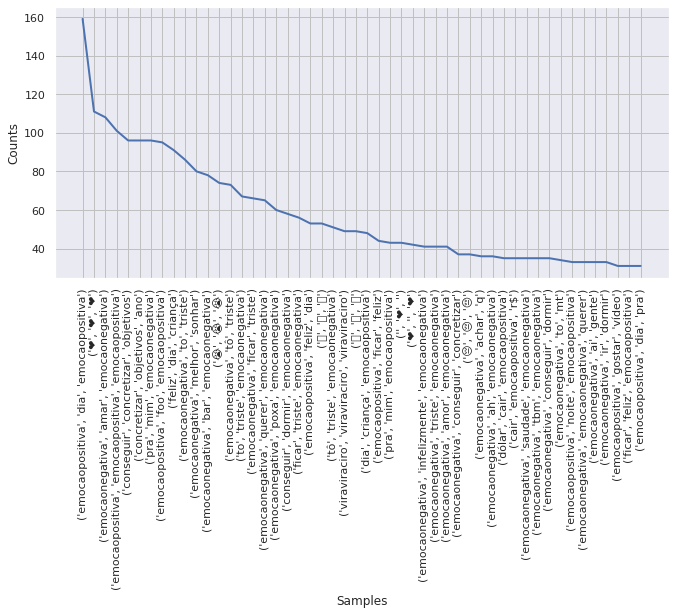

In [ ]:
freq_dist_trigramas.plot(50);

**Sugestão**: Fazer os gráficos dos bigramas e trigramas segmentado por sentimento.

**Leitura Complementar**:

https://en.wikipedia.org/wiki/N-gram

https://www.pythonprogramming.in/generate-the-n-grams-for-the-given-sentence-using-nltk-or-textblob.html